In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,5


In [2]:
df_energy = pd.read_csv('energy_dataset.csv')#,parse_dates=['time'])
df_energy['time'] = pd.to_datetime(df_energy['time'],infer_datetime_format=True) #df_energy.set_index('time')
indexed_df_energy=df_energy.set_index(['time'])
indexed_df_energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
indexed_df_energy.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [4]:
# Drop unusable columns,all except price actual[EUR/MWh]

indexed_df_energy = indexed_df_energy.drop(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead'], axis=1)
#adding missing values
indexed_df_energy.fillna(df_energy.mean(), inplace=True)
#printing head
indexed_df_energy.head()


,price actual
time,
2015-01-01 00:00:00+01:00,65.41
2015-01-01 01:00:00+01:00,64.92
2015-01-01 02:00:00+01:00,64.48
2015-01-01 03:00:00+01:00,59.32
2015-01-01 04:00:00+01:00,56.04


In [5]:
#printing tail
indexed_df_energy.tail()

,price actual
time,
2018-12-31 19:00:00+01:00,77.02
2018-12-31 20:00:00+01:00,76.16
2018-12-31 21:00:00+01:00,74.30
2018-12-31 22:00:00+01:00,69.89
2018-12-31 23:00:00+01:00,69.88


In [6]:
indexed_df_energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 1 columns):
price actual    35064 non-null float64
dtypes: float64(1)
memory usage: 547.9+ KB


In [7]:
#df_energy['time']=pd.to_datetime(df_energy['time'],utc=True,format='%Y-%m-%d %H:%M:%S')
#indexed_df=df_energy.set_index('time')
#indexed_df.head()

In [8]:
#dateTime=df_energy['time']
#dateTime.head()

In [9]:
#dateTime[4].day

In [10]:
#df_energy['price actual'][50]

In [11]:
#dateTime[50]

def OneColumnHourly(name):
    x=[]
    y=[]
    for i in range(0,8928):#len(df_energy)):
        x.append(dateTime[i])
        y.append(df_energy[name][i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xlabel('')
    plt.ylabel(f'{name} in MW')
    plt.plot(x,y)
OneColumnHourly('generation wind onshore')    

def OneColumnHourly(name):
    x=[]
    y=[]
    for i in range(0,8928):#len(df_energy)):
        x.append(dateTime[i])
        y.append(df_energy[name][i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xlabel('')
    plt.ylabel(f'{name} in MW')
    plt.plot(x,y)
OneColumnHourly('generation solar')    

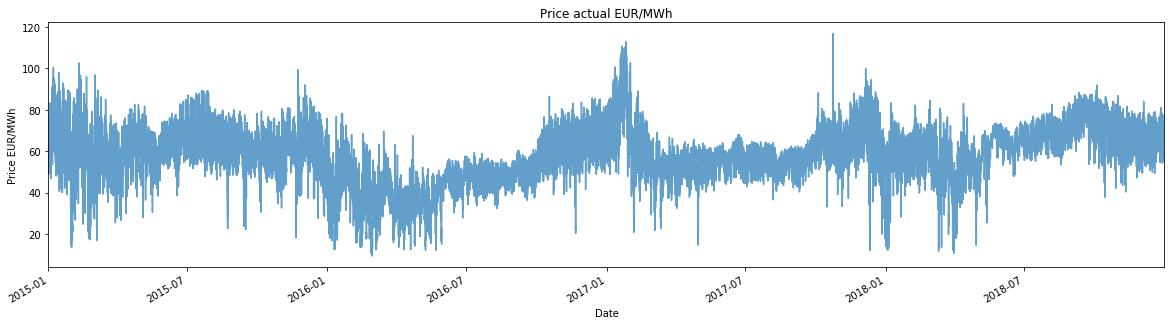

In [12]:
#plot graph
prices_plot=indexed_df_energy['price actual'].plot(
    figsize=(20,5),
    subplots=False,
    title='Price actual EUR/MWh',
    alpha=0.7
)
prices_plot=plt.xlabel('Date')
prices_plot=plt.ylabel('Price EUR/MWh')

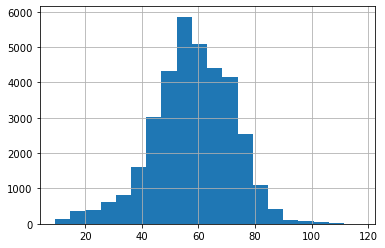

In [13]:
indexed_df_energy['price actual'].hist(bins=20)

In [14]:
one, two, three = np.split(
        indexed_df_energy['price actual'].sample(
        frac=1), [int(.25*len(indexed_df_energy['price actual'])),
        int(.75*len(indexed_df_energy['price actual']))])

In [15]:
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()
print (mean1, mean2, mean3)
print (var1, var2, var3)

57.85557038558059 57.9511812685376 57.77815879534573
201.669302578216 202.10785890342422 201.16386536029293


At the cell above the means and variances are similar, pointing to stationary data.

In [16]:
#determing rolling statistics
rolmean=indexed_df_energy.rolling(window=24).mean()
rolstd=indexed_df_energy.rolling(window=24).std()
print(rolmean,rolstd)

                           price actual
time                                   
2015-01-01 00:00:00+01:00           NaN
2015-01-01 01:00:00+01:00           NaN
2015-01-01 02:00:00+01:00           NaN
2015-01-01 03:00:00+01:00           NaN
2015-01-01 04:00:00+01:00           NaN
2015-01-01 05:00:00+01:00           NaN
2015-01-01 06:00:00+01:00           NaN
2015-01-01 07:00:00+01:00           NaN
2015-01-01 08:00:00+01:00           NaN
2015-01-01 09:00:00+01:00           NaN
2015-01-01 10:00:00+01:00           NaN
2015-01-01 11:00:00+01:00           NaN
2015-01-01 12:00:00+01:00           NaN
2015-01-01 13:00:00+01:00           NaN
2015-01-01 14:00:00+01:00           NaN
2015-01-01 15:00:00+01:00           NaN
2015-01-01 16:00:00+01:00           NaN
2015-01-01 17:00:00+01:00           NaN
2015-01-01 18:00:00+01:00           NaN
2015-01-01 19:00:00+01:00           NaN
2015-01-01 20:00:00+01:00           NaN
2015-01-01 21:00:00+01:00           NaN
2015-01-01 22:00:00+01:00           NaN


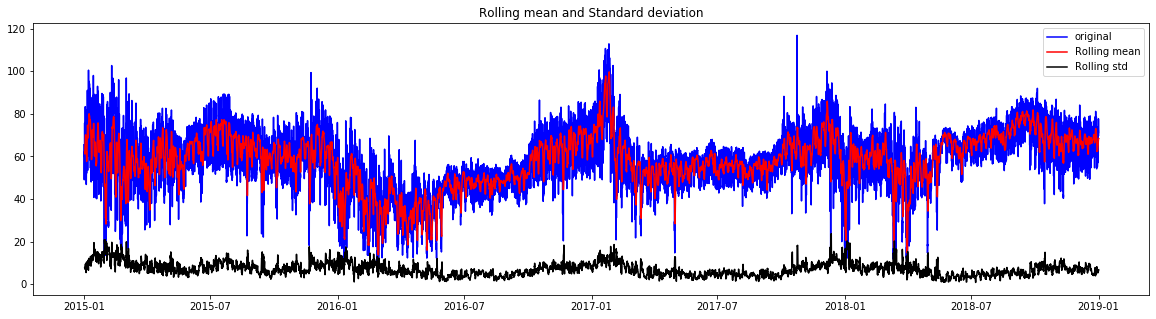

In [17]:
#plot rolling statistics
rcParams['figure.figsize']=20,5
orig=plt.plot(indexed_df_energy,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard deviation')
plt.show(block=False)

In [18]:
#perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Results of dickey fuller test")
dftest = adfuller(indexed_df_energy['price actual'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in dftest[4].items():
    dfoutput['critical value (%s)'%key] =  values
print(dfoutput)
    


Results of dickey fuller test
Test Statistics               -9.147016e+00
p-value                        2.750493e-15
No. of lags used               5.000000e+01
Number of observations used    3.501300e+04
critical value (1%)           -3.430537e+00
critical value (5%)           -2.861623e+00
critical value (10%)          -2.566814e+00
dtype: float64


Disckey-Fuller test shows that the series is actually stationary. In this case, the P-Value from our ADF test is much smaller than 0.05 significance level, therefore we can reject the Null hypothesis and instead accept the alternate hypothesis that stationarity exists. 

Taking a look at the critical value yields the same conclusion. The tests critical value ends up being -9.147 which is much smaller than the 5% critical value of -2.86 and so we have enough evidence to conclude that unit root does not exist. In other words, the series is stationary.

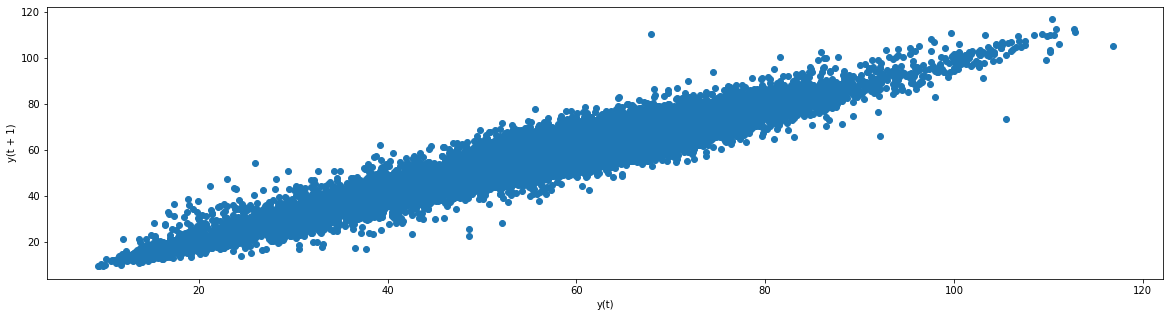

In [19]:
#Now that we know its stationary, we need to see if its correlated 
#( there’s an assumption of dependance / correlation for autoregression). 
pd.plotting.lag_plot(indexed_df_energy['price actual'])

Data is correlated somehow.
Let’s run a forecast on it now using autoregression.

In [20]:
#Creating train and test set 
#for the last 24 hour
train=indexed_df_energy[1:len(indexed_df_energy)-24]
test=indexed_df_energy[len(indexed_df_energy)-24:]
print(train.tail(25))
print(test.head(24))



                           price actual
time                                   
2018-12-29 23:00:00+01:00         68.31
2018-12-30 00:00:00+01:00         67.38
2018-12-30 01:00:00+01:00         57.69
2018-12-30 02:00:00+01:00         56.27
2018-12-30 03:00:00+01:00         55.40
2018-12-30 04:00:00+01:00         55.15
2018-12-30 05:00:00+01:00         55.13
2018-12-30 06:00:00+01:00         55.34
2018-12-30 07:00:00+01:00         56.35
2018-12-30 08:00:00+01:00         57.70
2018-12-30 09:00:00+01:00         61.77
2018-12-30 10:00:00+01:00         65.50
2018-12-30 11:00:00+01:00         65.67
2018-12-30 12:00:00+01:00         67.09
2018-12-30 13:00:00+01:00         69.40
2018-12-30 14:00:00+01:00         69.90
2018-12-30 15:00:00+01:00         66.97
2018-12-30 16:00:00+01:00         65.48
2018-12-30 17:00:00+01:00         68.20
2018-12-30 18:00:00+01:00         71.43
2018-12-30 19:00:00+01:00         72.37
2018-12-30 20:00:00+01:00         73.35
2018-12-30 21:00:00+01:00         73.64


In [21]:
print(len(train))

35039


In [22]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score
 
#train the autoregression model
model = AR(train)
model_fitted = model.fit()
 
print('The lag value chose is: %s' % model_fitted.k_ar)

C:\Users\pc\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The lag value chose is: 52


In [23]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train), 
    end=len(train) + len(test), 
    dynamic=False)
 
# create a comparison dataframe
compare_df = pd.concat(
    [indexed_df_energy['price actual'].reset_index().tail(24),
    predictions], axis=1).rename(
    columns={'price actual': 'actual', 0:'predicted'})
compare_df=compare_df[['actual', 'predicted']].dropna()

C:\Users\pc\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [24]:
len(predictions)


25

In [25]:
predictions

35039    67.039204
35040    61.474095
35041    57.877057
35042    56.323827
35043    55.699809
35044    55.906728
35045    56.664443
35046    57.989644
35047    59.862996
35048    62.991207
35049    65.308070
35050    65.578462
35051    65.915452
35052    66.419436
35053    65.593425
35054    63.956769
35055    63.664503
35056    65.768320
35057    68.609339
35058    69.613096
35059    70.229904
35060    70.375744
35061    69.144624
35062    67.485526
35063    64.952805
dtype: float64

In [26]:
compare_df

,actual,predicted
35040,68.40,61.474095
35041,60.32,57.877057
35042,57.73,56.323827
35043,57.66,55.699809
35044,57.04,55.906728
35045,57.48,56.664443
35046,61.13,57.989644
35047,60.70,59.862996
35048,66.64,62.991207
35049,70.33,65.308070


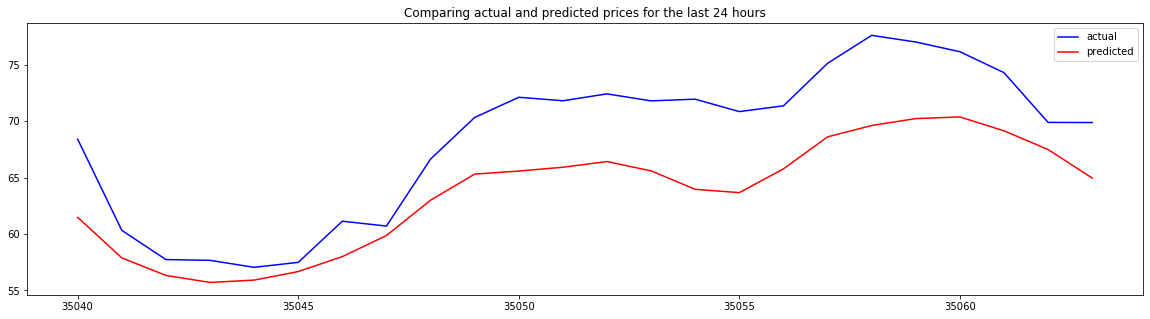

In [27]:
#plotting predicted values vs. actual values
rcParams['figure.figsize']=20,5
actual=plt.plot(compare_df['actual'],color='blue',label='actual')
predicted=plt.plot(compare_df['predicted'],color='red',label='predicted')

plt.legend(loc='best')
plt.title('Comparing actual and predicted prices for the last 24 hours')
plt.show(block=False)

In [28]:
r2 = r2_score(compare_df.actual, compare_df.predicted)
r2

0.3763682574357665

The r^2 (or r Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [29]:
new=pd.date_range(start='2019-01-01',end='2019-01-02', freq='H', tz='CET')
df = pd.DataFrame(index=new)
df = df.join(indexed_df_energy)
df

,price actual
2019-01-01 00:00:00+01:00,NaN
2019-01-01 01:00:00+01:00,NaN
2019-01-01 02:00:00+01:00,NaN
2019-01-01 03:00:00+01:00,NaN
2019-01-01 04:00:00+01:00,NaN
2019-01-01 05:00:00+01:00,NaN
2019-01-01 06:00:00+01:00,NaN
2019-01-01 07:00:00+01:00,NaN
2019-01-01 08:00:00+01:00,NaN
2019-01-01 09:00:00+01:00,NaN


In [30]:
# make predictions 
frames = [indexed_df_energy, df]

result = pd.concat(frames)


In [31]:
result

,price actual
2015-01-01 00:00:00+01:00,65.41
2015-01-01 01:00:00+01:00,64.92
2015-01-01 02:00:00+01:00,64.48
2015-01-01 03:00:00+01:00,59.32
2015-01-01 04:00:00+01:00,56.04
2015-01-01 05:00:00+01:00,53.63
2015-01-01 06:00:00+01:00,51.73
2015-01-01 07:00:00+01:00,51.43
2015-01-01 08:00:00+01:00,48.98
2015-01-01 09:00:00+01:00,54.20


In [32]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35089 entries, 2015-01-01 00:00:00+01:00 to 2019-01-02 00:00:00+01:00
Data columns (total 1 columns):
price actual    35064 non-null float64
dtypes: float64(1)
memory usage: 548.3+ KB


In [33]:
#train the autoregression model
train2=result[0:len(result)-25]
test2=result[len(result)-25:]
print(train2.tail(25))
print(test2.head(24))


                           price actual
2018-12-30 23:00:00+01:00         69.49
2018-12-31 00:00:00+01:00         68.40
2018-12-31 01:00:00+01:00         60.32
2018-12-31 02:00:00+01:00         57.73
2018-12-31 03:00:00+01:00         57.66
2018-12-31 04:00:00+01:00         57.04
2018-12-31 05:00:00+01:00         57.48
2018-12-31 06:00:00+01:00         61.13
2018-12-31 07:00:00+01:00         60.70
2018-12-31 08:00:00+01:00         66.64
2018-12-31 09:00:00+01:00         70.33
2018-12-31 10:00:00+01:00         72.12
2018-12-31 11:00:00+01:00         71.81
2018-12-31 12:00:00+01:00         72.42
2018-12-31 13:00:00+01:00         71.80
2018-12-31 14:00:00+01:00         71.95
2018-12-31 15:00:00+01:00         70.85
2018-12-31 16:00:00+01:00         71.36
2018-12-31 17:00:00+01:00         75.13
2018-12-31 18:00:00+01:00         77.61
2018-12-31 19:00:00+01:00         77.02
2018-12-31 20:00:00+01:00         76.16
2018-12-31 21:00:00+01:00         74.30
2018-12-31 22:00:00+01:00         69.89


In [34]:
print(len(train2))
print(len(test2))

35064
25


In [35]:
model2 = AR(train2)
model_fitted2 = model2.fit()
predictions_future= model_fitted2.predict(start=len(train2), 
    end=len(train2)+len(test2), 
    dynamic=False)

C:\Users\pc\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pc\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [36]:
predictions_future

35064    67.865790
35065    62.598161
35066    59.963253
35067    59.302984
35068    58.701255
35069    59.055778
35070    60.399280
35071    61.567867
35072    64.320025
35073    67.228801
35074    69.143731
35075    69.515039
35076    69.635346
35077    69.619485
35078    69.033927
35079    67.788868
35080    67.980162
35081    70.113636
35082    72.129400
35083    72.581832
35084    72.428987
35085    71.459671
35086    69.297688
35087    67.652672
35088    65.484788
35089    61.167685
dtype: float64

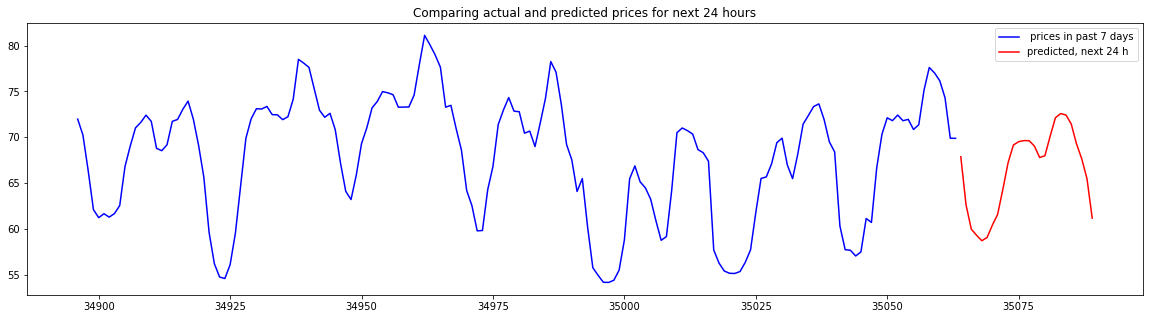

In [37]:
#plotting predicted values 
rcParams['figure.figsize']=20,5
old_df=plt.plot(df_energy['price actual'].tail(168),color='blue',label=' prices in past 7 days')
future_df=plt.plot(predictions_future,color='red',label='predicted, next 24 h')

plt.legend(loc='best')
plt.title('Comparing actual and predicted prices for next 24 hours')
plt.show(block=False)